In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
def parse(input_string:str) -> dict:
    x = input_string.split('<')
    a = []
    for y in x:
        if len(y) > 0:
            a += [y.split('>')]

    path = []
    temp_dict = {}

    output_data = {}
    data_keys = []

    for b in a:
        if len(b[1].strip()) > 0:
            temp_dict['/'.join(path+[b[0]])] = b[1]
        elif b[0][0] == '/':
            if path[-1] == b[0][1:]:
                path.pop()
        else:
            if path == []:
                data_keys.append(b[0])
            path.append(b[0])
    for key in data_keys:
        num_samples = int(temp_dict[key + '/num_samples'])
        input_size = int(temp_dict[key + '/input_size'])
        sample_times = np.array([float(x) for x in temp_dict[key + '/sample_times'].split()])
        data = np.array([[float(x) for x in line.split()] for line in temp_dict[key + '/data'].split('\n')])
        output_data[key + '/sample_times'] = sample_times
        output_data[key + '/data'] = data
    
    output_data['keys'] = data_keys

    return output_data

['svh_state', 'svh_input']


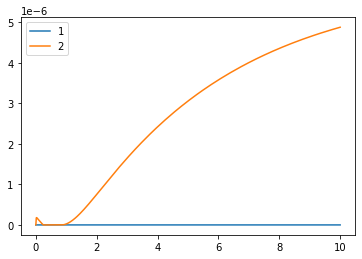

In [6]:
with open("/home/alexm/simulation_logs/svh_log.txt") as file:
    fstr = file.read()

x = parse(fstr)
print(x['keys'])


plt.plot(x['svh_input/sample_times'], x['svh_input/data'][7, :])
plt.plot(x['svh_state/sample_times'], x['svh_state/data'][7, :])
plt.legend([i+1 for i in range(9)])
plt.show()